In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

train_dir = os.path.abspath(os.getcwd()) + "/data/chest_xray/train/"
print(tf.__version__)

2.5.0


In [36]:
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir , labels='inferred')
print(train_ds.class_names)

Found 5216 files belonging to 2 classes.
['NORMAL', 'PNEUMONIA']


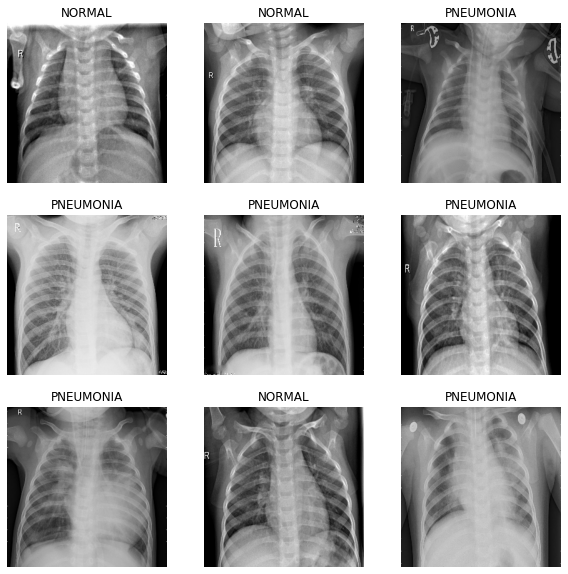

In [37]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

## Image channels 

In [38]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
print(image_batch[0])

(32, 256, 256, 3)
(32,)
tf.Tensor(
[[[0.        0.        0.       ]
  [0.        0.        0.       ]
  [0.        0.        0.       ]
  ...
  [6.357422  6.357422  6.357422 ]
  [0.        0.        0.       ]
  [0.        0.        0.       ]]

 [[0.        0.        0.       ]
  [0.        0.        0.       ]
  [0.        0.        0.       ]
  ...
  [4.7128906 4.7128906 4.7128906]
  [0.        0.        0.       ]
  [0.        0.        0.       ]]

 [[0.        0.        0.       ]
  [0.        0.        0.       ]
  [0.        0.        0.       ]
  ...
  [6.3650665 6.3650665 6.3650665]
  [0.        0.        0.       ]
  [0.        0.        0.       ]]

 ...

 [[0.        0.        0.       ]
  [0.        0.        0.       ]
  [0.        0.        0.       ]
  ...
  [0.        0.        0.       ]
  [0.        0.        0.       ]
  [0.        0.        0.       ]]

 [[0.        0.        0.       ]
  [0.        0.        0.       ]
  [0.        0.        0.       ]
  ...
  [

According to the documentation (https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory#returns), 3 channels (last dimension of image_batch tensor) corresponds to color channels RGB. Needs standardization to go from RGB to grayscale.

In [39]:
# taken from tensorflow docs to show new range of color channel of this dataset
# https://www.tensorflow.org/tutorials/load_data/images#standardize_the_data

standardization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

standardized_ds = train_ds.map(lambda x, y: (standardization_layer(x), y))
image_batch, labels_batch = next(iter(standardized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

print(image_batch[0])

0.0 0.7835085
tf.Tensor(
[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.25088167 0.25088167 0.25088167]
  [0.2418924  0.2418924  0.2418924 ]
  [0.21948087 0.21948087 0.21948087]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.24860603 0.24860603 0.24860603]
  [0.23977028 0.23977028 0.23977028]
  [0.22354475 0.22354475 0.22354475]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.24422489 0.24422489 0.24422489]
  [0.23764817 0.23764817 0.23764817]
  [0.22677697 0.22677697 0.22677697]]

 ...

 [[0.05676234 0.05676234 0.05676234]
  [0.07058824 0.07058824 0.07058824]
  [0.07832762 0.07832762 0.07832762]
  ...
  [0.072721   0.072721   0.072721  ]
  [0.06101924 0.06101924 0.06101924]
  [0.03844294 0.03844294 0.03844294]]

 [[0.05809027 0.05809027 0.05809027]
  [0.0714215

## Creating the model

In [41]:
num_classes = 2
model = Sequential(
    [
        layers.Conv2D(16, 3 , activation='relu'),
        layers.MaxPooling2D(),
        layers.Dense(num_classes, activation="relu"),
    ]
)